# Recordando derivadas y puntos críticos

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Noviembre de 2024  
**Versión:** 1.0  

---

## Descripción

Este notebook explica los conceptos de derivadas y puntos críticos

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Concepto de punto crítico

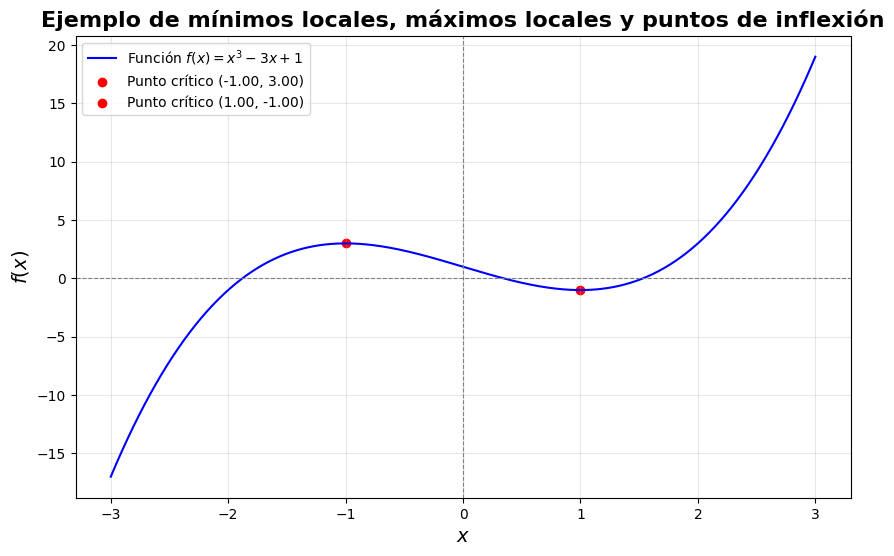

In [4]:
# Crear datos para la función y su derivada
x = np.linspace(-3, 3, 500)
y = x**3 - 3*x + 1  # Función
dy = 3*x**2 - 3  # Derivada de la función

# Identificar puntos críticos (donde la derivada es 0)
critical_points_x = np.roots([3, 0, -3])  # Raíces de la derivada
critical_points_y = critical_points_x**3 - 3*critical_points_x + 1

# Configuración del gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Función $f(x) = x^3 - 3x + 1$", color="blue")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Añadir puntos críticos
for xc, yc in zip(critical_points_x, critical_points_y):
    plt.scatter(xc, yc, color="red", label=f"Punto crítico ({xc:.2f}, {yc:.2f})")

# Etiquetas y título
plt.title("Ejemplo de mínimos locales, máximos locales y puntos de inflexión", fontsize=16, fontweight="bold")
plt.xlabel("$x$", fontsize=14, fontweight="bold")
plt.ylabel("$f(x)$", fontsize=14, fontweight="bold")
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


# Acercamiento a Deep Learning

En **Deep Learning**, el concepto de derivadas, máximos/mínimos locales y puntos de inflexión es fundamental para entrenar modelos, ya que los algoritmos de optimización, como el **Gradiente Descendente**, dependen directamente de estos conceptos.

**1. Mínimos locales y globales**

En el contexto de las redes neuronales profundas, ***la función de pérdida mide qué tan mal está funcionando el modelo***.

El **objetivo del entrenamiento **es minimizar la función de pérdida, buscando el mínimo global (el menor valor posible de la función de pérdida).
Sin embargo, debido a la alta dimensionalidad y la no linealidad de las redes profundas, la función de pérdida puede tener múltiples mínimos locales.

**Problema:** A veces el algoritmo puede quedar "atrapado" en un mínimo local.

**Soluciones comunes:**

+ Uso de inicializaciones aleatorias adecuadas.
+ Optimización mediante algoritmos avanzados como Adam, RMSProp, que ajustan dinámicamente los pasos.
+ Añadir ruido (e.g., dropout o batch normalization) para "saltar" fuera de mínimos locales.

**2. Puntos de inflexión**

Los puntos de inflexión representan cambios en la curvatura de la función de pérdida (de cóncava hacia convexa o viceversa).

En el entrenamiento de redes neuronales, estos puntos son importantes porque afectan la magnitud del gradiente:

+ Cuando la pérdida está cerca de un mínimo local o global, las pendientes son pequeñas y el gradiente descendente se mueve más lento (saturación del aprendizaje).

+ Cuando la pérdida está cerca de un punto de inflexión, el cambio en la pendiente puede hacer que el entrenamiento sea más inestable.

**3. Gradiente Descendente y derivadas**

Derivadas calculadas sobre la función de pérdida (a través del algoritmo backpropagation) guían los pesos de la red hacia valores que minimicen el error.

El gradiente descendente:

+ Utiliza la primera derivada para calcular la dirección de cambio en los pesos.
+ A veces usa la segunda derivada (curvatura) en métodos como Newton’s Method, pero esto es menos común en redes profundas.



---


Si un modelo cae en un mínimo local, podría no llegar al mínimo global, lo que resulta en un modelo subóptimo.

Un buen algoritmo de optimización busca moverse por esta superficie compleja, evitando colinas (máximos) y buscando los valles más bajos (mínimos globales).

---


**Derivadas, mínimos/máximos y puntos de inflexión** son herramientas clave para ajustar los pesos de las redes neuronales y lograr un modelo más preciso.


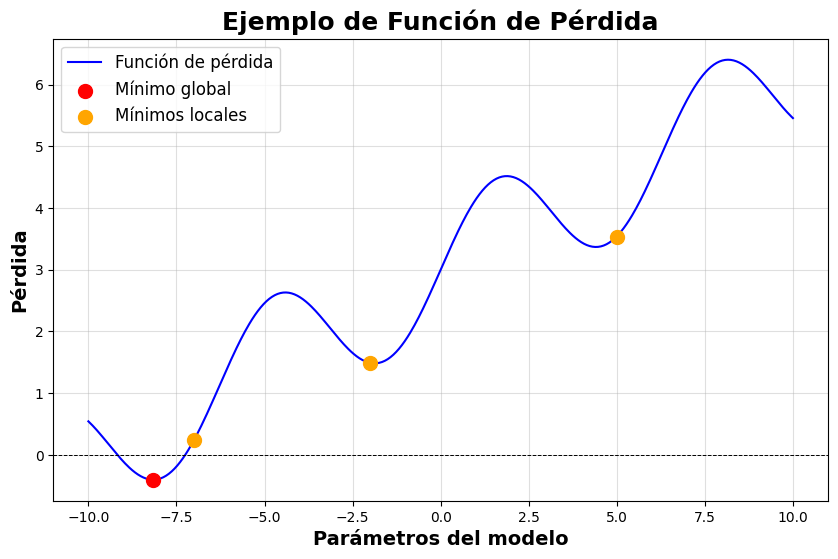

In [3]:
# Definir una función de pérdida simulada con múltiples mínimos locales y un mínimo global
x = np.linspace(-10, 10, 500)
loss_function = np.sin(x) + 0.3 * x + 3

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, loss_function, label="Función de pérdida", color="blue")
plt.scatter([x[np.argmin(loss_function)]], [np.min(loss_function)], color="red", label="Mínimo global", s=100, zorder=5)
plt.scatter([-7, -2, 5], [loss_function[np.argmin(np.abs(x + 7))], loss_function[np.argmin(np.abs(x + 2))], loss_function[np.argmin(np.abs(x - 5))]],
            color="orange", label="Mínimos locales", s=100, zorder=5)
plt.title("Ejemplo de Función de Pérdida", fontsize=18, fontweight="bold")
plt.xlabel("Parámetros del modelo", fontsize=14, fontweight="bold")
plt.ylabel("Pérdida", fontsize=14, fontweight="bold")
plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()


El gráfico muestra un ejemplo de una función de pérdida simulada, que muestra:

+ Mínimos locales: Representados por marcadores naranjas, son puntos donde la función tiene valores menores que sus alrededores inmediatos, pero no necesariamente son el valor más bajo globalmente.

+ Mínimo global: Marcado en rojo, es el punto donde la función alcanza su valor más bajo en toda su extensión.

Este tipo de función es representativa de los desafíos que enfrentan los algoritmos de optimización en redes neuronales, donde es crucial identificar el mínimo global para lograr la mejor configuración de parámetros. Sin embargo, los mínimos locales y la topología de la función pueden dificultar este proceso.